# The Question

    TEST YOUR INTUITION! Imagine ALL the workers in the USA (~200,000,000) worked for one company in a single hierarchy. At the bottom are minimum wage workers earning `$`10/hr. Every 5 minimum wage workers have a superior; every five superiors have their own superior and so on up the hierarchy to the Big Boss CEO (tree of degree 5). Every superior earns 1.3 times the wage of their subordinates i.e. `$`10 -> `$`13 -> `$`16.9 ... QUESTION: what is the hourly and annual wage of the Big Boss CEO??"

* Lets call the earnings multiplier `1.3` above the 'management multiplier'
* Lets call the number of workers per supervisor the 'team size'
* see below for a diagram of an example hierarchy where team size is 3 and the population of workers is 13

The mathematics of the model outlined above model is not very complicated but I suspect that intuition for what the Big Boss CEO should earn given such simple rules is not good - mine wasn't. This is likely because although the salary does grow exponentially up the hierarchy (like compound interest), the width of the hierarchy shrinks even faster. Below are presented some examples and interactive charts to explore the relationship between the size of teams, 'manager multiplier' and boss multiplier.

(An iteractive version of this notebook is published at the time of writing to [http://afternoon-oasis-29162.heroku.com] and the code is published to [https://github.com/hugoleeney/jupyter_notebooks/blob/main/Other/Fair%20Compensation.ipynb]

In [1]:
import math

def num_people(num_bosses, f=7):
    return (f**(num_bosses+1) -1)/(f-1)

def num_bosses(num_people, f=7):
    return math.floor(math.log((f-1)*num_people, f))

def inty(s):
    return int(s.replace(',', ''))


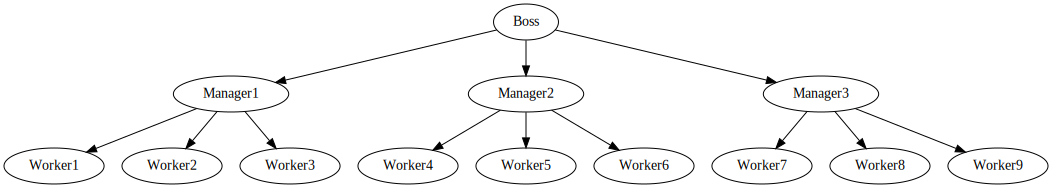

In [2]:
import graphviz


g = graphviz.Digraph()
g.edge('Boss', 'Manager1')
g.edge('Boss', 'Manager2')
g.edge('Boss', 'Manager3')
g.edge('Manager1', 'Worker1')
g.edge('Manager1', 'Worker2')
g.edge('Manager1', 'Worker3')
g.edge('Manager2', 'Worker4')
g.edge('Manager2', 'Worker5')
g.edge('Manager2', 'Worker6')
g.edge('Manager3', 'Worker7')
g.edge('Manager3', 'Worker8')
g.edge('Manager3', 'Worker9')
g

In [3]:
from IPython.display import Markdown as md

number_workers = 125200 * (1/0.05)
number_mng_levels = num_bosses(number_workers, 5)
max_salary_rel = 1.3**number_mng_levels
minimum_wage = 10.20
max_hourly = minimum_wage * max_salary_rel
max_annual = 40 * 52 * max_hourly

us_workers = 200000000
us_bosses = num_bosses(us_workers, 5)
china_workers = 1000000000
china_bosses = num_bosses(china_workers, 5)
disney_workers = 200000
disney_bosses = num_bosses(disney_workers, 5)
disney_bosses_10 = num_bosses(disney_workers, 5)
mult = 1.3
disney_mult = 2.72

text = f"""
# Examples

In Ireland the number of workers is about {number_workers:,.0f}.

The number of management levels in a hierarchy containing all {number_workers:,.0f} workers where each team 
has 5 employees would be {number_mng_levels}.

If every level is paid 1.3 times the salary of the workers at the next level down 
then relative to the lowest level the maximum salary would be {max_salary_rel:,.0f} times greater.

The minimum wage is 10.20 Euros, therefore the max hourly wage for a CEO would be {max_hourly:,.2f} and the 
max annual salary for 40 hours a week would be 40 x 52 x max_hourly = {max_annual:,.0f} (discounting that
most CEOs would work more hours than this).

Below the calculation is repeated for worker population sizes roughly equivalent to the USA, China 
and Disney corporation.


|  | Ireland | US | China | Disney | Disney for `$`65M |
| --- | --- | --- | --- | --- | --- |
| # workers                           | \
{number_workers:,.0f} |\
{us_workers:,.0f} |\
{china_workers:,.0f} |\
{disney_workers:,.0f} | \
{disney_workers:,.0f} | 
| # management levels with teams of 5 | \
{num_bosses(number_workers, 5)} | \
{us_bosses}       | \
{china_bosses}       | \
{disney_bosses} |\
{disney_bosses} |
| minimum wage                        | \
`$`{minimum_wage}               | \
`$`{minimum_wage} | \
`$`{minimum_wage}| \
`$`{minimum_wage}|\
`$`{minimum_wage}|
| boss multiplier                        | \
`$`{mult}               | \
`$`{mult} | \
`$`{mult}| \
`$`{mult}|\
`$`{disney_mult}|
| Boss hourly wage                    | \
`$`{max_hourly:,.0f}            | \
`$`{minimum_wage* (mult**us_bosses):,.0f} | \
`$`{minimum_wage* (mult**china_bosses):,.0f} | \
`$`{minimum_wage* (mult**disney_bosses):,.0f} |\
`$`{minimum_wage* (disney_mult**disney_bosses):,.0f} |
| Boss annual salary (40 hrs a week)  | \
`$`{max_annual:,.0f}            | \
`$`{minimum_wage* (mult**us_bosses)*40*52:,.0f} | \
`$`{minimum_wage* (mult**china_bosses)*40*52:,.0f} | \
`$`{minimum_wage* (mult**disney_bosses)*40*52:,.0f} | \
`$`{minimum_wage* (disney_mult**disney_bosses)*40*52:,.0f} |


Compare those outcomes with real-world Disney [2] where CEO Bob Iger’s 2019 compensation was `$` 65.6 Million in a 
company of 200,000 and a minimum wage of less than `$` 11. Iger's hourly rate for a 40hr week was equivalent
to about '$'30,000!

The final column of the table above includes details of a scenario where we set the manager multiplier for Disney
 so that the in our calculation the CEO salary is approximately correct. The required
multiplier for being a manager would be around {disney_mult}. That means that if you were a manager of a 
concession stand or shop with a staff of 5 (those staff on the minimum wage of `$`10.2.) you would earn 
{10.2*disney_mult:,.2f} an hour or {10.2*52*40*disney_mult:,.0f} a year. Their boss in turn would 
earn {10.2*52*40*disney_mult**2:,.0f}

Below in the interactive charts you can set a value for team size and/or manager multiplier and see what
the boss of such a scenario would earn under the stated rules.

"""

md(text)




# Examples

In Ireland the number of workers is about 2,504,000.

The number of management levels in a hierarchy containing all 2,504,000 workers where each team 
has 5 employees would be 10.

If every level is paid 1.3 times the salary of the workers at the next level down 
then relative to the lowest level the maximum salary would be 14 times greater.

The minimum wage is 10.20 Euros, therefore the max hourly wage for a CEO would be 140.62 and the 
max annual salary for 40 hours a week would be 40 x 52 x max_hourly = 292,481 (discounting that
most CEOs would work more hours than this).

Below the calculation is repeated for worker population sizes roughly equivalent to the USA, China 
and Disney corporation.


|  | Ireland | US | China | Disney | Disney for `$`65M |
| --- | --- | --- | --- | --- | --- |
| # workers                           | 2,504,000 |200,000,000 |1,000,000,000 |200,000 | 200,000 | 
| # management levels with teams of 5 | 10 | 12       | 13       | 8 |8 |
| minimum wage                        | `$`10.2               | `$`10.2 | `$`10.2| `$`10.2|`$`10.2|
| boss multiplier                        | `$`1.3               | `$`1.3 | `$`1.3| `$`1.3|`$`2.72|
| Boss hourly wage                    | `$`141            | `$`238 | `$`309 | `$`83 |`$`30,560 |
| Boss annual salary (40 hrs a week)  | `$`292,481            | `$`494,292 | `$`642,580 | `$`173,065 | `$`63,564,515 |


Compare those outcomes with real-world Disney [2] where CEO Bob Iger’s 2019 compensation was `$` 65.6 Million in a 
company of 200,000 and a minimum wage of less than `$` 11. Iger's hourly rate for a 40hr week was equivalent
to about '$'30,000!

The final column of the table above includes details of a scenario where we set the manager multiplier for Disney
 so that the in our calculation the CEO salary is approximately correct. The required
multiplier for being a manager would be around 2.72. That means that if you were a manager of a 
concession stand or shop with a staff of 5 (those staff on the minimum wage of `$`10.2.) you would earn 
27.74 an hour or 57,708 a year. Their boss in turn would 
earn 156,964

Below in the interactive charts you can set a value for team size and/or manager multiplier and see what
the boss of such a scenario would earn under the stated rules.



# Effect of Team Size

Below you can see several charts of how the Boss Salary changes with the multiplier. Each chart has the team size set at a different value. Of course the smaller the team size the more management levels there are and the higher the Big Bosses salary. The value of the population used is 1,000,000.

This chart is available in interactive form at the link above.

In [32]:

%matplotlib inline
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

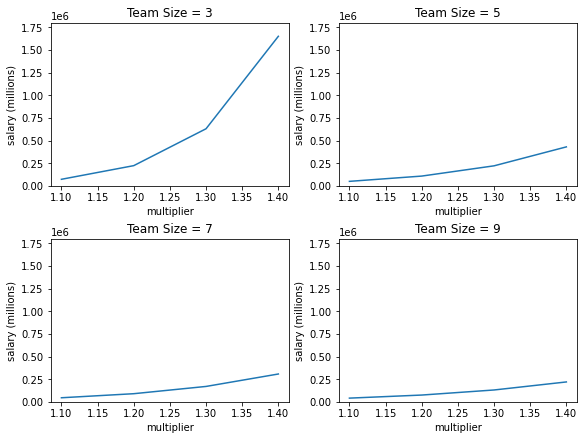

In [44]:
def calc_salaries_with_team_size(team_size, x_s):
    return [40*52*10*(n**num_bosses(1000000, team_size)) for n in x_s]


x_s = [x/10 for x in range(11,15)]
fig, ax = plt.subplots(2, 2, constrained_layout=True, figsize=(8,6))

ax[0,0].set_title("Team Size = 3")
ax[0,0].set_xlabel('multiplier')
ax[0,0].set_ylabel('salary (millions)')
y_s = calc_salaries_with_team_size(3, x_s)
ax[0,0].set_ylim((0,1800000))
ax[0,0].plot(x_s, y_s)

ax[0,1].set_title("Team Size = 5")
ax[0,1].set_xlabel('multiplier')
ax[0,1].set_ylabel('salary (millions)')
y_s = calc_salaries_with_team_size(5, x_s)
ax[0,1].set_ylim((0,1800000))
ax[0,1].plot(x_s, y_s)

ax[1,0].set_title("Team Size = 7")
ax[1,0].set_xlabel('multiplier')
ax[1,0].set_ylabel('salary (millions)')
y_s = calc_salaries_with_team_size(7, x_s)
ax[1,0].set_ylim((0,1800000))
ax[1,0].plot(x_s, y_s)

ax[1,1].set_title("Team Size = 9")
ax[1,1].set_xlabel('multiplier')
ax[1,1].set_ylabel('salary (millions)')
y_s = calc_salaries_with_team_size(9, x_s)
ax[1,1].set_ylim((0,1800000))
ax[1,1].plot(x_s, y_s)

plt.show()

# Effect of the Multiplier

Below you can see several charts of how the Boss Salary changes with the team-size. Each chart has the multipler set at a different value. Of course the higher the multiplier the larger the salary increase at each level. The value of the population used is 1,000,000.

This chart is available in interactive form at the link above.

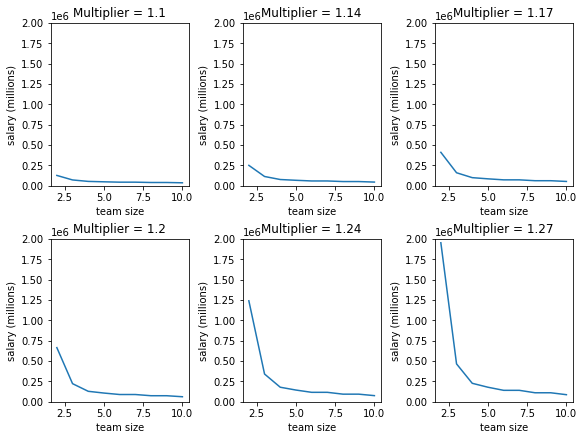

In [43]:

def calc_salaries(boss_multiplier, x_s):
    return [40*52*10*(boss_multiplier**num_bosses(1000000, n)) for n in x_s]



x_s = [x for x in range(2,11)]


fig, ax = plt.subplots(2, 3, constrained_layout=True, figsize=(8,6))

multipliers = [
    [1.1, 1.14, 1.17],
    [1.2, 1.24, 1.27]
]
for i in range(2):
    for j in range(3):
        multiplier = multipliers[i][j]
        ax[i,j].set_title(f"Multiplier = {multiplier}")
        ax[i,j].set_xlabel('team size')
        ax[i,j].set_ylabel('salary (millions)')
        y_s = calc_salaries(multiplier, x_s)
        ax[i,j].set_ylim((0,2000000))
        ax[i,j].plot(x_s, y_s)

plt.show()


# Tabulating Boss Salaries

Below find several tables that lists boss salaries by 
- team size (3 to 9) in the rows
- 'boss multiplier' (how much more a boss earns that their subordinates - 1.1 to 1.9) in the columns

Each table has a successively higher minimum wage. The value of the population used is 1,000,000.

This chart is available in interactive form where you can dynamically change the minimum wage and population at the link above. 

In [52]:
min_wage = 5
population = 1000000
result = []
for i, team_size in enumerate(range(3, 10)):
    vals = []
    for j, boss_multiplier in enumerate([x/10 for x in range(11, 20)]):
        vals.append(40*52*min_wage*(boss_multiplier**num_bosses(population, team_size)))
    result.append(vals)
print("Minimum Wage = 5")
pd.DataFrame(result, index=range(3,10), columns=[str(x/10) for x in range(11, 20)]).round(0)

Minimum Wage = 5


,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9
3,"$35,904","$111,273","$314,990","$825,463","$2,024,043","$4,683,744","$10,300,761","$21,655,883","$43,735,103"
4,"$26,975","$64,394","$143,373","$300,825","$599,716","$1,143,492","$2,096,634","$3,713,286","$6,376,309"
5,"$24,523","$53,662","$110,287","$214,875","$399,811","$714,683","$1,233,314","$2,062,937","$3,355,952"
6,"$22,293","$44,718","$84,836","$153,482","$266,541","$446,677","$725,479","$1,146,076","$1,766,291"
7,"$22,293","$44,718","$84,836","$153,482","$266,541","$446,677","$725,479","$1,146,076","$1,766,291"
8,"$20,267","$37,265","$65,258","$109,630","$177,694","$279,173","$426,752","$636,709","$929,627"
9,"$20,267","$37,265","$65,258","$109,630","$177,694","$279,173","$426,752","$636,709","$929,627"


In [51]:
min_wage = 10
population = 1000000
result = []
for i, team_size in enumerate(range(3, 10)):
    vals = []
    for j, boss_multiplier in enumerate([x/10 for x in range(11, 20)]):
        vals.append(40*52*min_wage*(boss_multiplier**num_bosses(population, team_size)))
    result.append(vals)
print("Minimum Wage = 10")
pd.DataFrame(result, index=range(3,10), columns=[str(x/10) for x in range(11, 20)]).round(0)

Minimum Wage = 10


,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9
3,"$71,807","$222,546","$629,980","$1,650,927","$4,048,086","$9,367,487","$20,601,522","$43,311,767","$87,470,206"
4,"$53,950","$128,788","$286,746","$601,650","$1,199,433","$2,286,984","$4,193,267","$7,426,572","$12,752,618"
5,"$49,045","$107,323","$220,574","$429,750","$799,622","$1,429,365","$2,466,628","$4,125,873","$6,711,904"
6,"$44,587","$89,436","$169,672","$306,964","$533,081","$893,353","$1,450,958","$2,292,152","$3,532,581"
7,"$44,587","$89,436","$169,672","$306,964","$533,081","$893,353","$1,450,958","$2,292,152","$3,532,581"
8,"$40,533","$74,530","$130,517","$219,260","$355,388","$558,346","$853,504","$1,273,418","$1,859,253"
9,"$40,533","$74,530","$130,517","$219,260","$355,388","$558,346","$853,504","$1,273,418","$1,859,253"


In [54]:
min_wage = 15
population = 1000000
result = []
for i, team_size in enumerate(range(3, 10)):
    vals = []
    for j, boss_multiplier in enumerate([x/10 for x in range(11, 20)]):
        vals.append(40*52*min_wage*(boss_multiplier**num_bosses(population, team_size)))
    result.append(vals)
print("Minimum Wage = 15")
pd.DataFrame(result, index=range(3,10), columns=[str(x/10) for x in range(11, 20)]).round(0)

Minimum Wage = 15


,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9
3,"$107,711","$333,819","$944,970","$2,476,390","$6,072,129","$14,051,231","$30,902,283","$64,967,650","$131,205,308"
4,"$80,925","$193,182","$430,118","$902,475","$1,799,149","$3,430,476","$6,289,901","$11,139,858","$19,128,927"
5,"$73,568","$160,985","$330,860","$644,625","$1,199,433","$2,144,048","$3,699,942","$6,188,810","$10,067,856"
6,"$66,880","$134,154","$254,508","$460,446","$799,622","$1,340,030","$2,176,436","$3,438,228","$5,298,872"
7,"$66,880","$134,154","$254,508","$460,446","$799,622","$1,340,030","$2,176,436","$3,438,228","$5,298,872"
8,"$60,800","$111,795","$195,775","$328,890","$533,081","$837,519","$1,280,257","$1,910,126","$2,788,880"
9,"$60,800","$111,795","$195,775","$328,890","$533,081","$837,519","$1,280,257","$1,910,126","$2,788,880"


In [55]:
min_wage = 20
population = 1000000
result = []
for i, team_size in enumerate(range(3, 10)):
    vals = []
    for j, boss_multiplier in enumerate([x/10 for x in range(11, 20)]):
        vals.append(40*52*min_wage*(boss_multiplier**num_bosses(population, team_size)))
    result.append(vals)
print("Minimum Wage = 20")
pd.DataFrame(result, index=range(3,10), columns=[str(x/10) for x in range(11, 20)]).round(0)

Minimum Wage = 20


,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9
3,"$143,614","$445,092","$1,259,960","$3,301,853","$8,096,171","$18,734,974","$41,203,045","$86,623,534","$174,940,411"
4,"$107,900","$257,576","$573,491","$1,203,299","$2,398,866","$4,573,968","$8,386,535","$14,853,144","$25,505,236"
5,"$98,091","$214,647","$441,147","$859,500","$1,599,244","$2,858,730","$4,933,256","$8,251,746","$13,423,808"
6,"$89,173","$178,872","$339,344","$613,928","$1,066,162","$1,786,706","$2,901,915","$4,584,304","$7,065,162"
7,"$89,173","$178,872","$339,344","$613,928","$1,066,162","$1,786,706","$2,901,915","$4,584,304","$7,065,162"
8,"$81,067","$149,060","$261,034","$438,520","$710,775","$1,116,691","$1,707,009","$2,546,835","$3,718,506"
9,"$81,067","$149,060","$261,034","$438,520","$710,775","$1,116,691","$1,707,009","$2,546,835","$3,718,506"


In [8]:
from functools import reduce


text =f"""
# Differences to Real World


Obviously the stated rules are not how things work in the real world. They vastly under-predict the amount
that companies/share-holders see fit to pay their CEOs. Also of course no country or company has a 
single hierarchy. Countries have many companies and organisiations. Companies themselves have departments, 
branches, business units etc. You might think that this would cause the above model to over-predict - after all
this means that the average hierarchy will be shallower. However
competition for talent between industries and companies could also drive salaries up and at the end of
the day companies pay what they can afford which has more to do with the specific industry, profitability and
investor mindsets.

Here are some more reasons why the model might underpredict salaries.


* specialities/more valuable or rare skills - supply and demand
* years of education 
    - acts as an investment, must be repaid
    - adds to possible value, rarity
* jobs no-one wants to do / hours that they don't want to work
* incentivise the 'best' people to do the most important work
* incentivise people to not misbehave in positions of asymmetric power (although questionable if this would ever work)
* ...

Of course we must also recognize that a CEO doesn't necessarily get compensated in cash like a regular employee 
does and so comparing the two `$` value compensations can be problematic.


# Power Dynamics & (possibly) a Better (but still simple) Model

One other key factor in the disparity between the model and the real world could be that as employees 
rise in an organisation they have more influence over how much they get paid. Lets try to model that 
phenomenon.

In the model used above the sequence of wages at each level forms a geometric sequence (the next number in the
sequence is some multiple of the previous number). Lets keep the simple hierarchy but say that at each 
managerial level the employee earns a higher multiple of their subordinates salary. 

For example, lets try to increase the management multiplier by a fixed value 0.3 at each level. This means 
that we now have an arithmetic sequence (grows by a fixed amount) for the multiplier. 
The first 3 multiplier values will be 1.3, 1.6, 1.9 ... We will use 8 levels of management as there would be
in the case of Disney. At the 8th the CEO will earn 3.4 times his direct reports. 

- bottom level: `$`10
- level 1: (x 1.3) `$` {10*1.3:,.2f}
- level 2: (x 1.6) `$` {10*1.3*1.6:,.2f} 
- level 3: (x 1.9) `$` {10*1.3*1.6*1.9:,.2f}
- level 4: (x 2.2) `$` {10*1.3*1.6*1.9*2.2:,.2f}
- level 5: (x 2.5) `$` {10*1.3*1.6*1.9*2.2*2.5:,.2f}
- level 6: (x 2.8) `$` {10*1.3*1.6*1.9*2.2*2.5*2.8:,.2f}
- level 7: (x 3.1) `$` {10*1.3*1.6*1.9*2.2*2.5*2.8*3.1:,.2f}
- level 8: (x 3.4) `$` {10*1.3*1.6*1.9*2.2*2.5*2.8*3.1*3.4:,.2f}

This model produces a CEO hourly rate of `$` {10*1.3*1.6*1.9*2.2*2.5*2.8*3.1*3.4:,.2f} whereas in Disney's case
it was closer to `$`30k (based on a 40hr week). 

To produce a 30k figure we'd have to start at 1.3 for the first level of management and increase the
management multiplier by about 0.47 at each level. 

- bottom level: `$`10
- level 1: (x 1.3) `$` {10*1.3}
- level 2: (x {1.3+(1*0.47):,.2f}) `$` {reduce(lambda x, y: x * y, [x/100 for x in range(130,130+(47*2), 47)], 10):,.2f}
- level 3: (x {1.3+(2*0.47):,.2f}) `$` {reduce(lambda x, y: x * y, [x/100 for x in range(130,130+(47*3), 47)], 10):,.2f}
- level 4: (x {1.3+(3*0.47):,.2f}) `$` {reduce(lambda x, y: x * y, [x/100 for x in range(130,130+(47*4), 47)], 10):,.2f}
- level 5: (x {1.3+(4*0.47):,.2f}) `$` {reduce(lambda x, y: x * y, [x/100 for x in range(130,130+(47*5), 47)], 10):,.2f}
- level 6: (x {1.3+(5*0.47):,.2f}) `$` {reduce(lambda x, y: x * y, [x/100 for x in range(130,130+(47*6), 47)], 10):,.2f}
- level 7: (x {1.3+(6*0.47):,.2f}) `$` {reduce(lambda x, y: x * y, [x/100 for x in range(130,130+(47*7), 47)], 10):,.2f}
- level 8: (x {1.3+(7*0.47):,.2f}) `$` {reduce(lambda x, y: x * y, [x/100 for x in range(130,130+(47*8), 47)], 10):,.2f}

This is still somewhat unsatisfactory. The arithmetic increase in management multiplier means that the first 
3 levels of employee earn 10, 13 and 23 dollars respectively. This seems to be too fast an increase.

We could try a geometric increase in the multiplier i.e. the multiplier would grow by some multiple at each
level instead of by a fixed value. Below we will start with a smaller multiplier of 1.2 but we will grow the
multiplier by 1.323 at i.e. 1.2 -> {1.2*(1.323**1):,.2f} -> {1.2*(1.323**2):,.2f} ...

- bottom level: `$`10
- level 1: (x 1.2) `$` {10*1.2}
- level 2: (x {1.2*(1.323**1):,.2f}) `$` {1.2*reduce(lambda x, y: x * y, [1.323**x for x in range(1,2)], 10):,.2f}
- level 3: (x {1.2*(1.323**2):,.2f}) `$` {1.2*reduce(lambda x, y: x * y, [1.323**x for x in range(1,3)], 10):,.2f}
- level 4: (x {1.2*(1.323**3):,.2f}) `$` {1.2*reduce(lambda x, y: x * y, [1.323**x for x in range(1,4)], 10):,.2f}
- level 5: (x {1.2*(1.323**4):,.2f}) `$` {1.2*reduce(lambda x, y: x * y, [1.323**x for x in range(1,5)], 10):,.2f}
- level 6: (x {1.2*(1.323**5):,.2f}) `$` {1.2*reduce(lambda x, y: x * y, [1.323**x for x in range(1,6)], 10):,.2f}
- level 7: (x {1.2*(1.323**6):,.2f}) `$` {1.2*reduce(lambda x, y: x * y, [1.323**x for x in range(1,7)], 10):,.2f}
- level 8: (x {1.2*(1.323**7):,.2f}) `$` {1.2*reduce(lambda x, y: x * y, [1.323**x for x in range(1,8)], 10):,.2f}

That has flattened out the bottom end and feels a little bit more realistic. However note that the CEOs
direct reports are all still making nearly 9 million a year. Whether or not that is accurate I don't know.
If we had details of all Disney employees' salaries we would be able to do a much more in depth modelling
exersize - perhaps some kind of regression. That's beyone the scope of this short article though. Disney 
probably has far more than 8 seniority levels across the company. It also has many business units and 
functional departments that make a single-hierarchy model only so useful. What we can conclude is that to 
get from a low hourly wage of `$`10 to an annual salary of `$`65 million means making very big jumps between
levels of seniority - jumps that can't be accounted for by a simple compounding rate of increase. Such a 
disparity in income would be outrageous in the civil service, army and other 
public sector organisations. We should probably expect a different dynamic in the private sector but 
discomprehension and outrage at compensation such as Bob Iger's in the year stated above is understandable.



## Public Sector


There are many examples of where this model doesn't work in the private sector. It vastly 
under-predicts the amount that companies/share-holders see fit to pay their CEOs. There are two public 
sector examples I want to draw attention to. 

The first is the salary of the President of the USA - `$`400,000 a year. The second is the 
Prime Minister of Ireland - about €210,000. Those aren't that far off the numbers generated in the 
exammples above and that is
curious. Of course the head of state doesn't sit on top of a single hierarchy of workers but rather 
(in a democracy) should be a specialist from a relatively small pool of candidates. 

Many public pay structures are in/reviewed in the public domain [4].

"""


md(text)




# Differences to Real World


Obviously the stated rules are not how things work in the real world. They vastly under-predict the amount
that companies/share-holders see fit to pay their CEOs. Also of course no country or company has a 
single hierarchy. Countries have many companies and organisiations. Companies themselves have departments, 
branches, business units etc. You might think that this would cause the above model to over-predict - after all
this means that the average hierarchy will be shallower. However
competition for talent between industries and companies could also drive salaries up and at the end of
the day companies pay what they can afford which has more to do with the specific industry, profitability and
investor mindsets.

Here are some more reasons why the model might underpredict salaries.


* specialities/more valuable or rare skills - supply and demand
* years of education 
    - acts as an investment, must be repaid
    - adds to possible value, rarity
* jobs no-one wants to do / hours that they don't want to work
* incentivise the 'best' people to do the most important work
* incentivise people to not misbehave in positions of asymmetric power (although questionable if this would ever work)
* ...

Of course we must also recognize that a CEO doesn't necessarily get compensated in cash like a regular employee 
does and so comparing the two `$` value compensations can be problematic.


# Power Dynamics & (possibly) a Better (but still simple) Model

One other key factor in the disparity between the model and the real world could be that as employees 
rise in an organisation they have more influence over how much they get paid. Lets try to model that 
phenomenon.

In the model used above the sequence of wages at each level forms a geometric sequence (the next number in the
sequence is some multiple of the previous number). Lets keep the simple hierarchy but say that at each 
managerial level the employee earns a higher multiple of their subordinates salary. 

For example, lets try to increase the management multiplier by a fixed value 0.3 at each level. This means 
that we now have an arithmetic sequence (grows by a fixed amount) for the multiplier. 
The first 3 multiplier values will be 1.3, 1.6, 1.9 ... We will use 8 levels of management as there would be
in the case of Disney. At the 8th the CEO will earn 3.4 times his direct reports. 

- bottom level: `$`10
- level 1: (x 1.3) `$` 13.00
- level 2: (x 1.6) `$` 20.80 
- level 3: (x 1.9) `$` 39.52
- level 4: (x 2.2) `$` 86.94
- level 5: (x 2.5) `$` 217.36
- level 6: (x 2.8) `$` 608.61
- level 7: (x 3.1) `$` 1,886.68
- level 8: (x 3.4) `$` 6,414.73

This model produces a CEO hourly rate of `$` 6,414.73 whereas in Disney's case
it was closer to `$`30k (based on a 40hr week). 

To produce a 30k figure we'd have to start at 1.3 for the first level of management and increase the
management multiplier by about 0.47 at each level. 

- bottom level: `$`10
- level 1: (x 1.3) `$` 13.0
- level 2: (x 1.77) `$` 23.01
- level 3: (x 2.24) `$` 51.54
- level 4: (x 2.71) `$` 139.68
- level 5: (x 3.18) `$` 444.18
- level 6: (x 3.65) `$` 1,621.26
- level 7: (x 4.12) `$` 6,679.61
- level 8: (x 4.59) `$` 30,659.41

This is still somewhat unsatisfactory. The arithmetic increase in management multiplier means that the first 
3 levels of employee earn 10, 13 and 23 dollars respectively. This seems to be too fast an increase.

We could try a geometric increase in the multiplier i.e. the multiplier would grow by some multiple at each
level instead of by a fixed value. Below we will start with a smaller multiplier of 1.2 but we will grow the
multiplier by 1.323 at i.e. 1.2 -> 1.59 -> 2.10 ...

- bottom level: `$`10
- level 1: (x 1.2) `$` 12.0
- level 2: (x 1.59) `$` 15.88
- level 3: (x 2.10) `$` 27.79
- level 4: (x 2.78) `$` 64.35
- level 5: (x 3.68) `$` 197.14
- level 6: (x 4.86) `$` 799.06
- level 7: (x 6.43) `$` 4,284.87
- level 8: (x 8.51) `$` 30,398.83

That has flattened out the bottom end and feels a little bit more realistic. However note that the CEOs
direct reports are all still making nearly 9 million a year. Whether or not that is accurate I don't know.
If we had details of all Disney employees' salaries we would be able to do a much more in depth modelling
exersize - perhaps some kind of regression. That's beyone the scope of this short article though. Disney 
probably has far more than 8 seniority levels across the company. It also has many business units and 
functional departments that make a single-hierarchy model only so useful. What we can conclude is that to 
get from a low hourly wage of `$`10 to an annual salary of `$`65 million means making very big jumps between
levels of seniority - jumps that can't be accounted for by a simple compounding rate of increase. Such a 
disparity in income would be outrageous in the civil service, army and other 
public sector organisations. We should probably expect a different dynamic in the private sector but 
discomprehension and outrage at compensation such as Bob Iger's in the year stated above is understandable.



## Public Sector


There are many examples of where this model doesn't work in the private sector. It vastly 
under-predicts the amount that companies/share-holders see fit to pay their CEOs. There are two public 
sector examples I want to draw attention to. 

The first is the salary of the President of the USA - `$`400,000 a year. The second is the 
Prime Minister of Ireland - about €210,000. Those aren't that far off the numbers generated in the 
exammples above and that is
curious. Of course the head of state doesn't sit on top of a single hierarchy of workers but rather 
(in a democracy) should be a specialist from a relatively small pool of candidates. 

Many public pay structures are in/reviewed in the public domain [4].



# Conclusion

What MIGHT seem like a fair way to decide how much people at higher and higher levels of responsibility in an organisation should earn does not predict well what upper levels of management earn in firms around the world. It does seem that the increases employees see as they 'climb the ladder' in the private sector are probably somewhat geometric in nature. 

### References

[1] About wealth inequality ... https://www.theguardian.com/commentisfree/2018/apr/12/wealth-inequality-reasons-richest-global-gap]

[2] Figures for Disney ... https://www.forbes.com/sites/markmurphy/2019/04/23/abigail-disney-is-right-insane-ceo-compensation-can-have-a-corrosive-effect-on-society/

[3] Example of more in depth research in this topic ... https://www.sciencedirect.com/science/article/abs/pii/S0378426613001234

[4] https://www.ipa.ie/_fileUpload/Documents/CPMR_DP_38_Review_ofthe_Civil_Service_Grading_Pay_System.pdf